# Data Exploration, Correlation Analysis and Logistic Regressions

### Project by: Analia Colffer

    In this project I used the dataset "Movie Industry" by Daniel Grijalva to analyze what are the factors that contribute to a movie's gross income. I explored the data, conducted data cleaning, created visualizations for variables, made a correlation analysis, and conducted logistic regression analysis. 
    
    The project is divided in 4 parts:
    - Part 1: Exploratory Analysis
    - Part 2: Data Cleaning
    - Part 3: Data Visualization and Correlation Analysis
    - Part 4: Logistic Regression Analysis
    
    Dataset spurce: https://www.kaggle.com/datasets/danielgrijalvas/movies 
    

In [2]:
# Import packages 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import statsmodels
from statsmodels.formula.api import ols

#%matplotlib.inline
#matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:
# Read in the data

df = pd.read_csv("movies.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# Part 1: Exploratory Analysis

In [4]:
# Visualize columns, rows, and data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
# Find percentage of missing data per column

for col in df.columns:
    pct_missing = round(np.mean(df[col].isnull()), 3)
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.01%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.283%
gross - 0.025%
company - 0.002%
runtime - 0.001%



#### Insights:

    The dataset has 15 columns and a total of 7,668 rows. The data types are onject, float, and integer. 
        - The column budget is the one with the most null values, with 28% of its data missing. 
        - The column gross is the second with the most null values, with 2.5% of its data missing.
        
    Both of these columns will be dealth with in the next section, data cleaning.
    

In [6]:
# Get summary stats for numerical variables

round(df.describe(), 2)

,year,score,votes,budget,gross,runtime
count,7668.00,7665.00,7665.00,5.497000e+03,7.479000e+03,7664.00
mean,2000.41,6.39,88108.50,3.558988e+07,7.850054e+07,107.26
std,11.15,0.97,163323.76,4.145730e+07,1.657251e+08,18.58
min,1980.00,1.90,7.00,3.000000e+03,3.090000e+02,55.00
25%,1991.00,5.80,9100.00,1.000000e+07,4.532056e+06,95.00
50%,2000.00,6.50,33000.00,2.050000e+07,2.020576e+07,104.00
75%,2010.00,7.10,93000.00,4.500000e+07,7.601669e+07,116.00
max,2020.00,9.30,2400000.00,3.560000e+08,2.847246e+09,366.00



#### Insights:

    - The standard deviation for votes, budget, and gross income is high - this means the data will be highly skewed.
    - The column "year" appears in the summary statistics because its current data type is numerical. This will be changed in the next section, since I have no need to know the year's mean or median values.
    

# Part 2: Data Cleaning

In [7]:
# Creating Age column to make analysis easier
df['age'] = 2024 - df['year']

# Dropping year column since it's no longer needed
df = df.drop("year", axis=1)

# Changing data type of year and age to categorical
#df['year'] = df['year'].astype('object')
#df['age'] = df['age'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   released  7666 non-null   object 
 4   score     7665 non-null   float64
 5   votes     7665 non-null   float64
 6   director  7668 non-null   object 
 7   writer    7665 non-null   object 
 8   star      7667 non-null   object 
 9   country   7665 non-null   object 
 10  budget    5497 non-null   float64
 11  gross     7479 non-null   float64
 12  company   7651 non-null   object 
 13  runtime   7664 non-null   float64
 14  age       7668 non-null   int64  
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


    Insights:
    
    - I created a new column called "Age" to analyze the relationship between a movie's age (year 2024 - release year) and gross income.
    - I change the "year" data type to object since we won't be doing further analytics with it
    

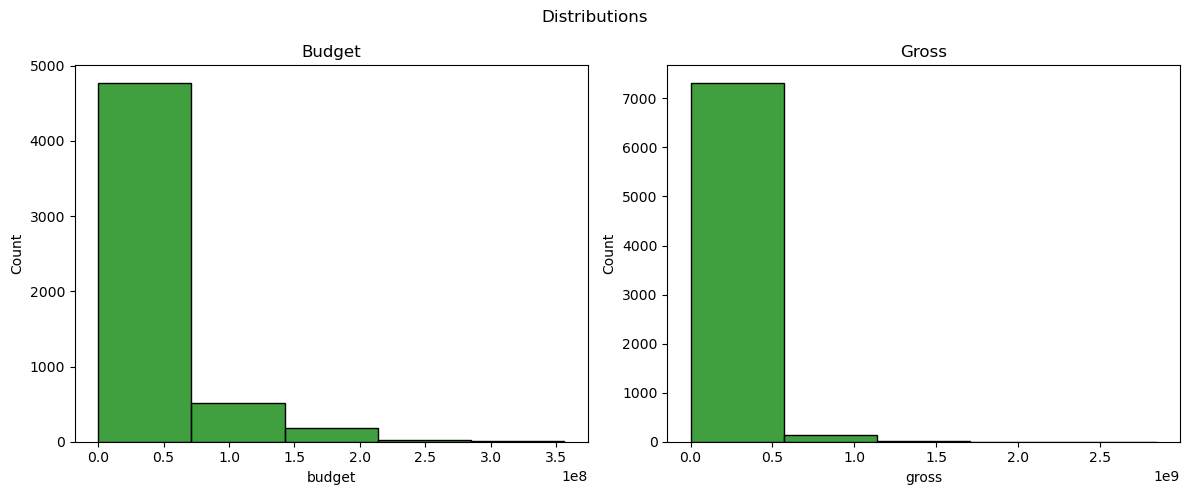

In [8]:
# Visualize distribution of Budget and Gross Income

plt.figure(figsize=(12,5))
plt.suptitle('Distributions')

plt.subplot(1, 2, 1)
sns.histplot(data = df, x='budget', bins = 5, color='green')
plt.title('Budget')

plt.subplot(1, 2, 2)
sns.histplot(data = df, x='gross', bins = 5, color='green')
plt.title('Gross')

plt.tight_layout()
plt.show()

In [9]:
# Fill missing values in budget and gross income columns with their respective median values

df2 = df
df2 = df2.fillna({'gross' : df['gross'].median(),
                 'budget' : df['budget'].median()})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   released  7666 non-null   object 
 4   score     7665 non-null   float64
 5   votes     7665 non-null   float64
 6   director  7668 non-null   object 
 7   writer    7665 non-null   object 
 8   star      7667 non-null   object 
 9   country   7665 non-null   object 
 10  budget    7668 non-null   float64
 11  gross     7668 non-null   float64
 12  company   7651 non-null   object 
 13  runtime   7664 non-null   float64
 14  age       7668 non-null   int64  
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


    Insights:
    
    Since both budget and gross are highly skewed and they are missing values, I filled the null values with their respective medians (since the median values are less suceptible to changes)
    

In [10]:
# Changing data types of budget and gross income to integers

df2['budget'] = df2['budget'].astype('int64')
df2['gross'] = df2['gross'].astype('int64')

# Check data types again to make sure change was made
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   released  7666 non-null   object 
 4   score     7665 non-null   float64
 5   votes     7665 non-null   float64
 6   director  7668 non-null   object 
 7   writer    7665 non-null   object 
 8   star      7667 non-null   object 
 9   country   7665 non-null   object 
 10  budget    5497 non-null   float64
 11  gross     7479 non-null   float64
 12  company   7651 non-null   object 
 13  runtime   7664 non-null   float64
 14  age       7668 non-null   int64  
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [11]:
# Order by gross revenue

df2.sort_values(by=['gross'], inplace=False, ascending=False)
df2.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,age
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,44
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,44
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,44
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,44
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,44


#### Insights:

    In the Data Cleaning Section, I:
        - Created a new column "age" for ease of analysis. This column replaces the "year" column.
        - Filled missing values in budget and gross income columns with their median values
        - Changed the data type of the budget and gross income columns to integers in order to get rid of decimals
        

# Part 3: Data Visualization and Correlation Analysis

<Figure size 640x480 with 0 Axes>

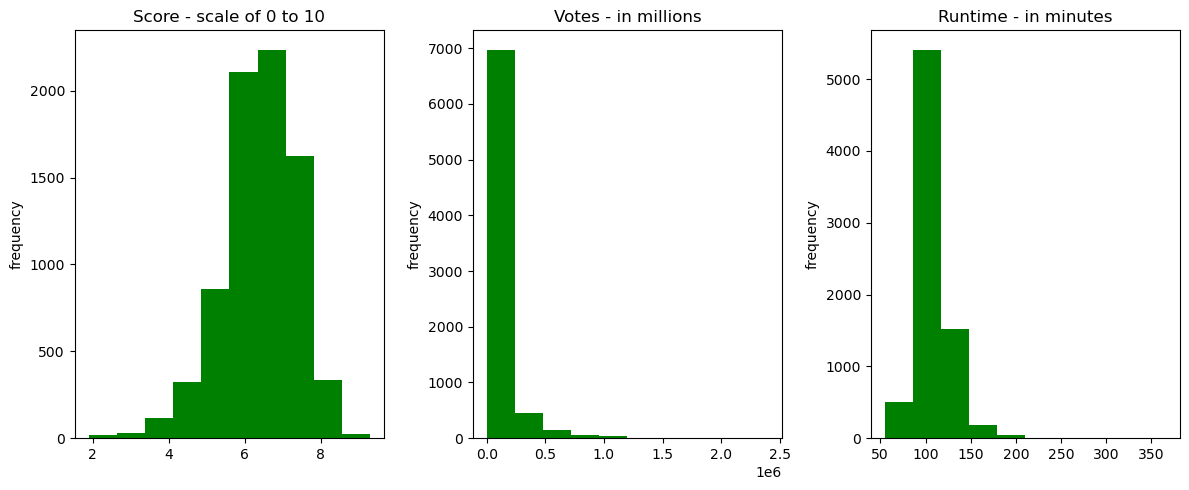

In [12]:
# Create subplots for Score, Votes, and Runtime

plt.suptitle('All Distributions')
plt.figure(figsize=(12,5))
#plt.subplots_adjust(hspace=.5)

plt.subplot(1,3,1)
plt.hist(df2.score, color='green')
plt.title('Score - scale of 0 to 10')
plt.ylabel('frequency')

plt.subplot(1,3,2)
plt.hist(df2.votes, color='green')
plt.title('Votes - in millions')
plt.ylabel('frequency')

plt.subplot(1,3,3)
plt.hist(df2.runtime, color='green')
plt.title('Runtime - in minutes')
plt.ylabel('frequency')

plt.tight_layout()
plt.show()


#### Insights:

    - Both Votes and Runtime are positively skewed, while score is negatively skewed. However, Score presents less variation than votes and runtime. 
    

In [13]:
# Determine correlations 
df2.corr()

C:\Users\Graduate\AppData\Local\Temp\ipykernel_13152\2113809890.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,score,votes,budget,gross,runtime,age
score,1.000000,0.409182,0.061979,0.185583,0.399451,-0.097995
votes,0.409182,1.000000,0.460932,0.632103,0.309212,-0.222945
budget,0.061979,0.460932,1.000000,0.745881,0.273363,-0.291690
gross,0.185583,0.632103,0.745881,1.000000,0.244360,-0.259504
runtime,0.399451,0.309212,0.273363,0.244360,1.000000,-0.120811
age,-0.097995,-0.222945,-0.291690,-0.259504,-0.120811,1.000000


#### Insights:

    From this correlation table, we can see that:
    - Votes and gross income have a moderate correlation of 63%
    - The movie's age is negatively correlated to all of the numerical variables
    - The budget is strongly correlated to the movie's gross income, with a 74% correlation
    - The scores and votes are moderately correlated, with a 41% correlation
    

<Figure size 640x480 with 0 Axes>

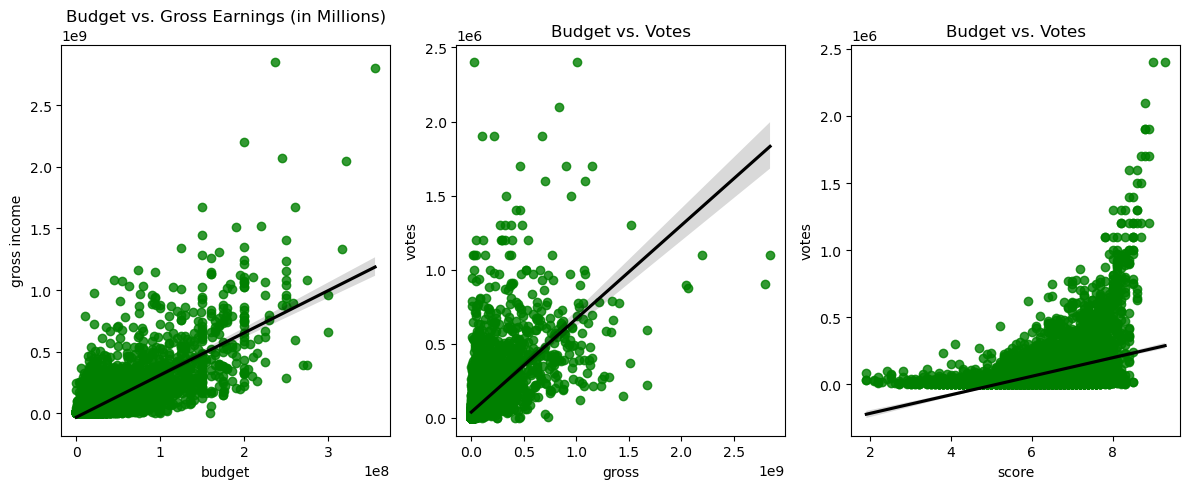

In [14]:
# Create subplots to visualize the above correlations

plt.suptitle('All Distributions')
plt.figure(figsize=(12,5))
#plt.subplots_adjust(hspace=.5)

plt.subplot(1,3,1)
sns.regplot(data=df2, x='budget', y='gross',
           scatter_kws={"color":"green"}, line_kws={"color": "black"}).set(title='Budget vs. Gross Earnings (in Millions)')
plt.ylabel('gross income')

plt.subplot(1,3,2)
sns.regplot(data=df2, x='gross', y='votes',
           scatter_kws={"color":"green"}, line_kws={"color": "black"}).set(title='Budget vs. Votes')
plt.ylabel('votes')

plt.subplot(1,3,3)
sns.regplot(data=df2, x='score', y='votes',
           scatter_kws={"color":"green"}, line_kws={"color": "black"}).set(title='Budget vs. Votes')
plt.ylabel('votes')

plt.tight_layout()
plt.show()

C:\Users\Graduate\AppData\Local\Temp\ipykernel_13152\3067202124.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df2.corr()


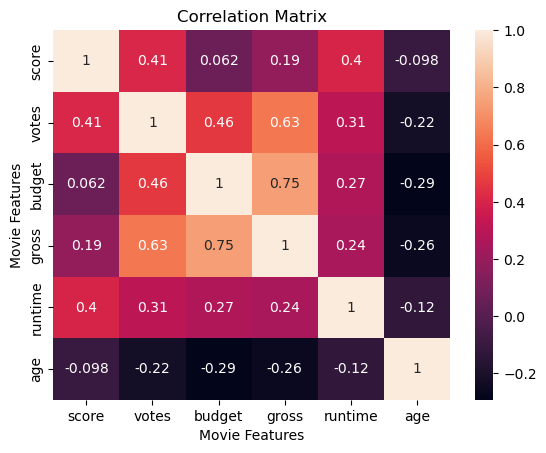

In [15]:
# Create correlation matrix

corr_matrix = df2.corr()

sns.heatmap(corr_matrix, annot=True, cmap= 'rocket')

plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.tight_layout
plt.show()

#### Insights:

    - The scatterplots show the strongest correlations between the variables:
            - Gross income and votes
            - Gross income and budget
            - Votes and Score
    - The correlation matrix also shows these correlation, where the lighter colors represent stronger correlations
    

In [16]:
import statsmodels
from statsmodels.formula.api import ols

# Part 4: Logistic Regression Analysis

In [17]:
# Model 1 - Gross income and age
model1 = ols("gross ~ age", data = df2).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     553.5
Date:                Mon, 15 Apr 2024   Prob (F-statistic):          3.09e-118
Time:                        16:25:34   Log-Likelihood:            -1.5565e+05
No. Observations:                7668   AIC:                         3.113e+05
Df Residuals:                    7666   BIC:                         3.113e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.67e+08   4.23e+06     39.487      0.0

#### Insights:
    
    - In the first model, I used gross income as the target variable and age of the movie as a predictive variable. 
    - In this model, the R-squared is 0.067 - this means that the current model only explains 6.7% of the variation in gross income
    - I will add more variables to increase R-squared
    

In [18]:
# Model 2: Gross income and age + votes

model2 = ols("gross ~ age + votes", data = df2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     2712.
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:25:34   Log-Likelihood:            -1.5381e+05
No. Observations:                7665   AIC:                         3.076e+05
Df Residuals:                    7662   BIC:                         3.076e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    6.71e+07   3.67e+06     18.283      0.0

#### Insights:
    
    - In the first model, I used gross income as the target variable and age and votes as the predictive variables. 
    - In this model, the R-squared is 0.414, a significant improvement compared to model 1. This means that the current model explains 41.7% of the variation in gross income
    - I will add more variables to increase R-squared

In [19]:
# Model 3: Gross income and age + votes + runtime + budget

model3 = ols("gross ~ age + votes + runtime + budget", data = df2).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     3763.
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:25:34   Log-Likelihood:            -1.5162e+05
No. Observations:                7661   AIC:                         3.032e+05
Df Residuals:                    7656   BIC:                         3.033e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.392e+06   7.14e+06     -0.895      0.3

#### Insights:
    
    - In the first model I used gross income as the target variable, and age, votes, runtime, and budget as the predictive variables. 
    - In this model, the R-squared is 0.663. This means that the current model explains 66.3% of the variation in gross income
    - Since the model has more variables, we can start seeing p-values. As of now, age has a p=value of 0.110 meaning that is not significant
    - I will add the last variable to see if R-squared increases

In [20]:
# Model 4: Gross income and age + votes + runtime + budget + score

model4 = ols("gross ~ age + votes + runtime + budget + score", data = df2).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     3011.
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:25:34   Log-Likelihood:            -1.5161e+05
No. Observations:                7661   AIC:                         3.032e+05
Df Residuals:                    7655   BIC:                         3.033e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.563e+07   9.39e+06     -1.665      0.0

#### Insights:
    
    - In the first model I used gross income as the target variable, and age, votes, runtime, budget, and score as the predictive variables. 
    - In this model, the R-squared is 0.663. It did not improve compared to model 3. 
    - This model shows that age has a p-value of 0.124, and score has a p-value of 0.129. This means that:
        - There is a 12.4% chance that age does not have an effect on gross income
        - There is a 12.9% chance that score does not have an effect on gross income


## Summary:

    - Our current model explains 63.3% of the variation in gross income. 
    - The variables budget and votes have the highest correlations with the movies' gross income
    - In order to strengthen this analysis, I suggest including categorical variables such as company and writer as predictor variables